In [1]:
#imports
import pandas as pd

In [2]:
file_path = "UK-HPI-full-file-2023-12.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139365 entries, 0 to 139364
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139365 non-null  object 
 1   RegionName              139365 non-null  object 
 2   AreaCode                139365 non-null  object 
 3   AveragePrice            139365 non-null  float64
 4   Index                   139365 non-null  float64
 5   IndexSA                 4884 non-null    float64
 6   1m%Change               138941 non-null  float64
 7   12m%Change              134553 non-null  float64
 8   AveragePriceSA          4884 non-null    float64
 9   SalesVolume             134898 non-null  float64
 10  DetachedPrice           132852 non-null  float64
 11  DetachedIndex           132852 non-null  float64
 12  Detached1m%Change       132462 non-null  float64
 13  Detached12m%Change      128196 non-null  float64
 14  SemiDetachedPrice   

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [6]:
def area_code_to_country(area_code):
    if area_code.startswith("E"):
        return "England"
    elif area_code.startswith("W"):
        return "Wales"
    elif area_code.startswith("S"):
        return "Scotland"
    elif area_code.startswith("N"):
        return "Northern Ireland"
    elif area_code.startswith("K"):
        return "England + Wales"
    else:
        return "Unknown"

In [7]:
# Adds a new column named "Country" to df
df["Country"] = df["AreaCode"].apply(area_code_to_country)

In [8]:
df_grouped = {group: data for group, data in df.groupby("Country")}

In [9]:
england_df = df_grouped["England"].reset_index()
wales_df = df_grouped["Wales"].reset_index()
scotland_df = df_grouped["Scotland"].reset_index()
northern_ireland_df = df_grouped["Northern Ireland"].reset_index()
england_wales_df = df_grouped["England + Wales"].reset_index()

In [10]:
print(len(england_df))
print(len(wales_df))
print(len(scotland_df))
print(len(northern_ireland_df))
print(len(england_wales_df))

118257
8325
8349
3177
1257


In [11]:
england_df

,index,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,...,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,Country
0,240,1995-01-01,Adur,E07000223,54516.42545,21.836620,NaN,NaN,NaN,NaN,...,22.378461,NaN,NaN,11.0,54372.37389,21.788639,NaN,NaN,68.0,England
1,241,1995-02-01,Adur,E07000223,55708.33312,22.314040,NaN,2.186328,NaN,NaN,...,22.906624,2.360142,NaN,5.0,55557.42782,22.263526,2.179515,NaN,64.0,England
2,242,1995-03-01,Adur,E07000223,55724.54586,22.320534,NaN,0.029103,NaN,NaN,...,22.975061,0.298764,NaN,5.0,55567.73779,22.267657,0.018557,NaN,98.0,England
3,243,1995-04-01,Adur,E07000223,55440.83646,22.206894,NaN,-0.509128,NaN,NaN,...,22.837862,-0.597163,NaN,2.0,55286.75938,22.155061,-0.505650,NaN,82.0,England
4,244,1995-05-01,Adur,E07000223,53334.35175,21.363139,NaN,-3.799518,NaN,NaN,...,21.982376,-3.745912,NaN,5.0,53184.96713,21.312810,-3.801620,NaN,72.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118252,139360,2023-08-01,Yorkshire and The Humber,E12000003,211911.00000,155.600000,151.8,1.600000,1.5,206734.0,...,185.100000,9.800000,15.7,27.0,206545.00000,153.900000,1.300000,0.9,5200.0,England
118253,139361,2023-09-01,Yorkshire and The Humber,E12000003,207500.00000,152.400000,149.0,-2.100000,-1.3,202860.0,...,172.700000,-6.700000,5.0,30.0,202675.00000,151.000000,-1.900000,-1.6,4777.0,England
118254,139362,2023-10-01,Yorkshire and The Humber,E12000003,210827.00000,154.800000,151.4,1.600000,0.1,206183.0,...,179.000000,3.600000,11.6,18.0,205746.00000,153.300000,1.500000,-0.4,3696.0,England
118255,139363,2023-11-01,Yorkshire and The Humber,E12000003,207212.00000,152.200000,148.2,-1.700000,-1.9,201827.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England


# Average Price

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Testing
monthly_avg_price = england_df.groupby("Date")
c = [a for a in monthly_avg_price]
d = monthly_avg_price["AveragePrice"]
e = [a for a in d]
e[0]

(Timestamp('1968-04-01 00:00:00'),
 30276     3025.670615
 34110     3408.108064
 57399     4418.489911
 88410     3468.159279
 109611    3328.858802
 117588    2712.015577
 Name: AveragePrice, dtype: float64)

In [14]:
monthly_avg_price_eng = england_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_wales = wales_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_scot = scotland_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_ni = northern_ireland_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_e_w = england_wales_df.groupby('Date')["AveragePrice"].mean()


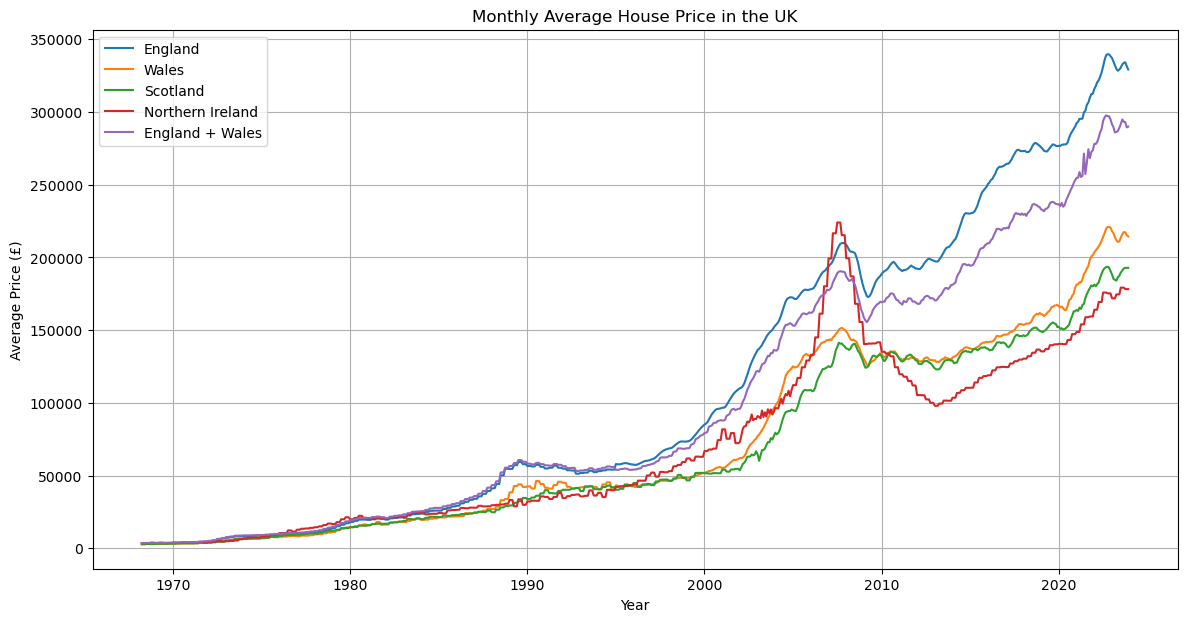

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_price_eng, label="England")
plt.plot(monthly_avg_price_wales, label="Wales")
plt.plot(monthly_avg_price_scot, label="Scotland")
plt.plot(monthly_avg_price_ni, label="Northern Ireland")
plt.plot(monthly_avg_price_e_w, label="England + Wales")
plt.title("Monthly Average House Price in the UK")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)

plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139365 entries, 0 to 139364
Data columns (total 55 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    139365 non-null  datetime64[ns]
 1   RegionName              139365 non-null  object        
 2   AreaCode                139365 non-null  object        
 3   AveragePrice            139365 non-null  float64       
 4   Index                   139365 non-null  float64       
 5   IndexSA                 4884 non-null    float64       
 6   1m%Change               138941 non-null  float64       
 7   12m%Change              134553 non-null  float64       
 8   AveragePriceSA          4884 non-null    float64       
 9   SalesVolume             134898 non-null  float64       
 10  DetachedPrice           132852 non-null  float64       
 11  DetachedIndex           132852 non-null  float64       
 12  Detached1m%Change       132462

# Mortgage Price

In [20]:
eng_grouped_by_date = england_df.groupby("Date")
wales_grouped_by_date = wales_df.groupby("Date")
scot_grouped_by_date = scotland_df.groupby("Date")
ni_grouped_by_date = northern_ireland_df.groupby("Date")
eng_wales_grouped_by_date = england_wales_df.groupby("Date")

In [22]:
mortagage_price_eng = eng_grouped_by_date["MortgagePrice"].mean()
mortagage_price_wales = wales_grouped_by_date["MortgagePrice"].mean()
mortagage_price_scot = scot_grouped_by_date["MortgagePrice"].mean()
mortagage_price_ni = ni_grouped_by_date["MortgagePrice"].mean()
mortagage_price_e_w = eng_wales_grouped_by_date["MortgagePrice"].mean()


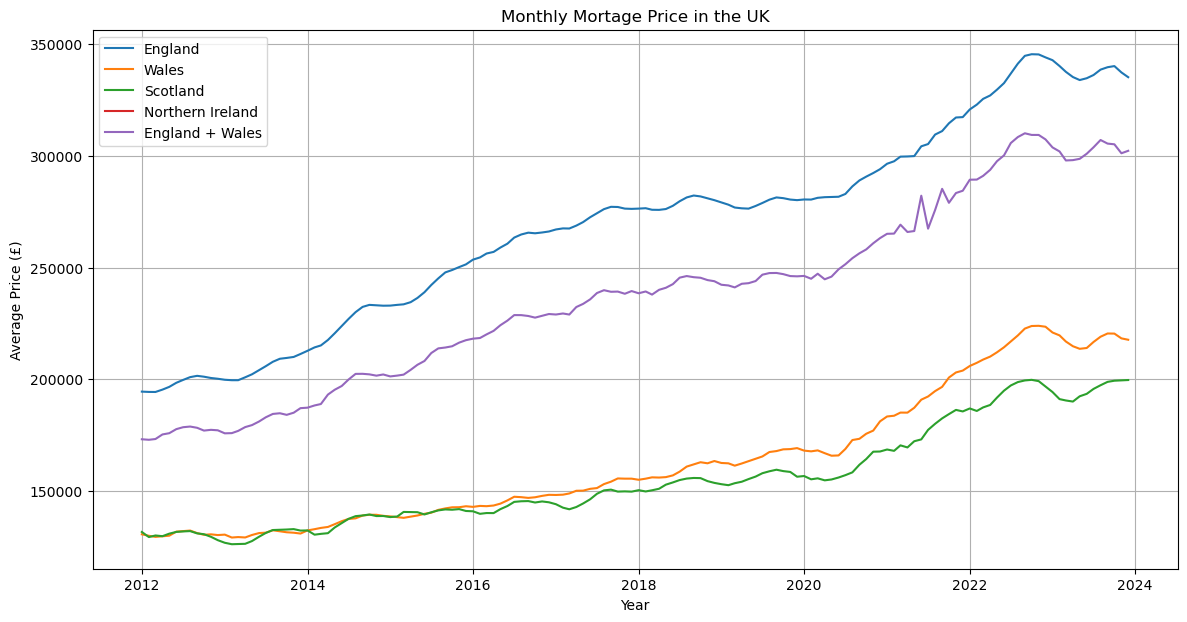

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(mortagage_price_eng, label="England")
plt.plot(mortagage_price_wales, label="Wales")
plt.plot(mortagage_price_scot, label="Scotland")
plt.plot(mortagage_price_ni, label="Northern Ireland")
plt.plot(mortagage_price_e_w, label="England + Wales")
plt.title("Monthly Mortage Price in the UK")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)

plt.show()


# Sales Volume

In [30]:
sales_vol_eng = eng_grouped_by_date["SalesVolume"].sum()
sales_vol_wales = wales_grouped_by_date["SalesVolume"].sum()
sales_vol_scot = scot_grouped_by_date["SalesVolume"].sum()
sales_vol_ni = ni_grouped_by_date["SalesVolume"].sum()
sales_vol_e_w = eng_wales_grouped_by_date["SalesVolume"].sum()


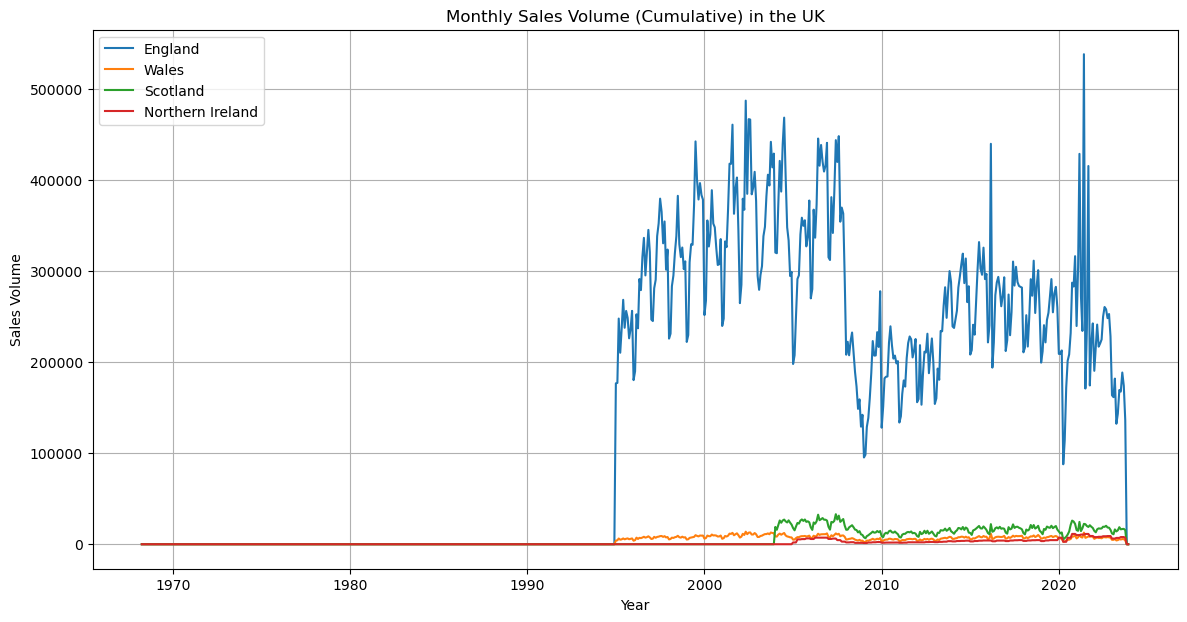

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(sales_vol_eng, label="England")
plt.plot(sales_vol_wales, label="Wales")
plt.plot(sales_vol_scot, label="Scotland")
plt.plot(sales_vol_ni, label="Northern Ireland")
#plt.plot(sales_vol_e_w, label="England + Wales")
plt.title("Monthly Sales Volume (Cumulative) in the UK")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid(True)

plt.show()


In [36]:
sales_vol_avg_eng = eng_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_wales = wales_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_scot = scot_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_ni = ni_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_e_w = eng_wales_grouped_by_date["SalesVolume"].mean()

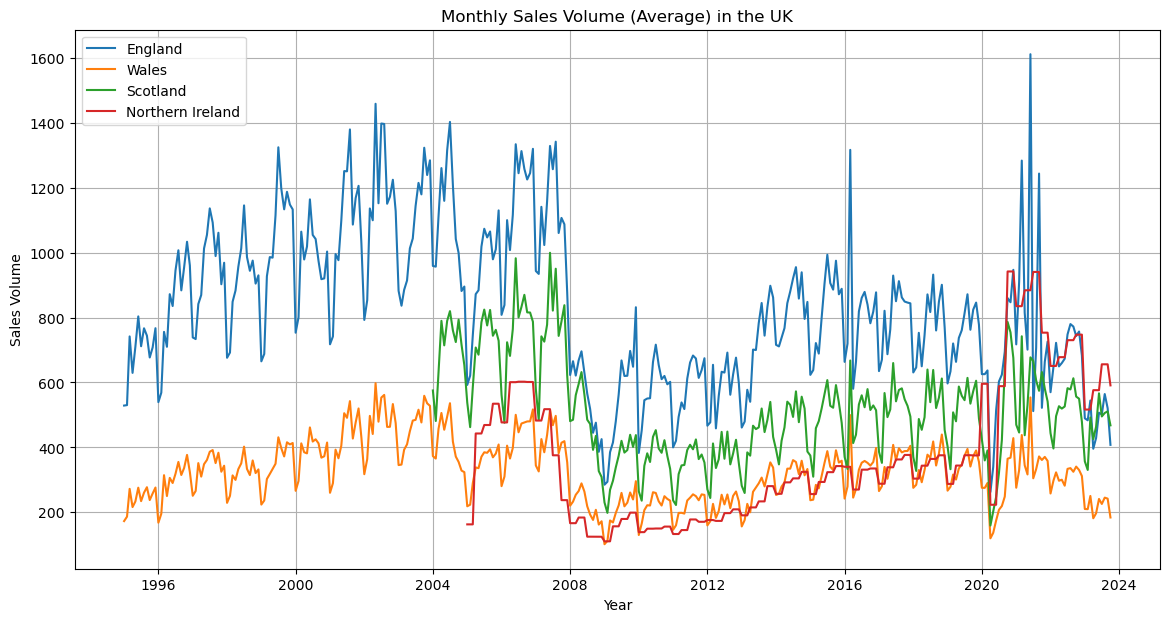

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(sales_vol_avg_eng, label="England")
plt.plot(sales_vol_avg_wales, label="Wales")
plt.plot(sales_vol_avg_scot, label="Scotland")
plt.plot(sales_vol_avg_ni, label="Northern Ireland")
#plt.plot(sales_vol_e_w, label="England + Wales")
plt.title("Monthly Sales Volume (Average) in the UK")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid(True)

plt.show()
